In [1]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils import adjust_box_widths
from matplotlib.patches import PathPatch

In [2]:
def read_csv_content(filename):
    data = []
    with open(filename) as file:
        file_reader = csv.reader(file)
        header = next(file_reader)
        for line in file_reader:
            data.append(['Congruent',float(line[0])])
            data.append(['Incongruent',float(line[1])])
            data.append(['Uninformative',float(line[2])])
    return data
    
def significance(tick_value, data_ratio, max_value, text='***',offset=0.13):
    hanbun_min = tick_value - data_ratio/2
    hanbun_max = tick_value + data_ratio/2
    plt.text(tick_value,max_value+offset-0.02,text,bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
          ha='center', va='center')
    plt.plot([hanbun_min,hanbun_max],[max_value+offset-0.03,max_value+offset-0.03],'k',linewidth=1)
    plt.plot([hanbun_min,hanbun_min],[max_value+offset-0.03,max_value+offset-0.04],'k',linewidth=1)
    plt.plot([hanbun_max,hanbun_max],[max_value+offset-0.03,max_value+offset-0.04],'k',linewidth=1)
    
def draw_line(y1,y2,y3,x1=0,x2=1,x3=2):
    plt.plot([x1,x2,x3],[y1,y2,y3],color='lightgrey',ls='-',linewidth=1)

In [3]:
data_list = read_csv_content("Fig2A_DataBehavior.csv")

data = pd.DataFrame(data_list,columns=["type","value"])


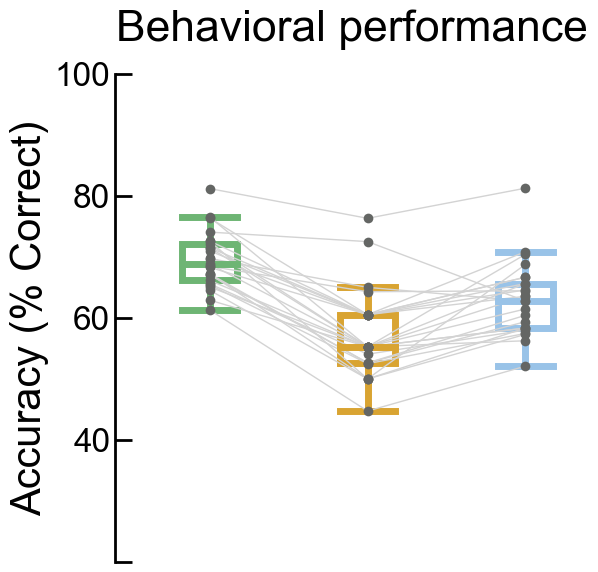

In [4]:
#colors for the dots

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'mediumblue','alpha': 1},
    'medianprops':{'color':'cornflowerblue','alpha': 1},
    'whiskerprops':{'color':'cornflowerblue','alpha': 1},
    'capprops':{'color':'cornflowerblue','alpha': 1}
}

colors_box = ['#6d8bde', "#d19b06", "#68b9d4"]
colors_box = ["#6eb574", "#d9a432",'#99c3e8' ]


boxplot = sns.boxplot(
    data=data,
    x='type',
    y='value',
    fliersize=0,
    palette=colors_box,
    width=0.7,
    linewidth=5,
    **PROPS
)


#CHANGE BOXPLOT STYLE

box_patches = [patch for patch in boxplot.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = boxplot.artists
    
num_patches = len(box_patches)
lines_per_boxplot = len(boxplot.lines) // num_patches

for i, patch in enumerate(box_patches):
    
    col = colors_box[i%3]
    patch.set_edgecolor(col)
    patch.set_facecolor('None')
    
    for line in boxplot.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        
        
#END CHANGE BOXPLOT STYLE

ax = sns.stripplot(
    data=data,
    x='type',
    y='value',
    jitter=0,
    size=7,
    color="#646664",
    dodge=True,
)

for i in range(0,int(len(data_list)/3)):
    draw_line(data_list[i*3][1],data_list[i*3+1][1],data_list[i*3+2][1])


plt.yticks(np.arange(0.4,1.01,step=0.1),np.arange(40,101,step=10))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_linewidth(2)


ax.set_xlabel("",fontsize=11)


ax.set_ylim([0.2,1])
ax.set_yticks([0.2,0.4,0.6,0.8,1], fontname='Arial')
ax.set_yticklabels(['','40','60','80','100'],fontname='Arial')

ax.set_xlim([-0.6,2.4])

plt.title("Behavioral performance", fontsize=32, fontname='Arial', y=1.05)
ax.set_xticklabels(['','', ''], fontsize=18, fontname='Arial')
ax.set_ylabel("Accuracy (% Correct)",fontsize=30, fontname='Arial')

ax.tick_params(axis='y', which='major', direction='in',length=12, labelsize=24, width=2)

fig = ax.get_figure()
plt.tick_params(bottom = False)
plt.tight_layout()
fig.tight_layout()

adjust_box_widths(fig, 0.5)

fig.set_size_inches([6,6])
fig.savefig("Fig2A.jpg",dpi=600)
plt.savefig('Fig2A.eps', format='eps',dpi=600)
